#### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,accuracy_score,recall_score,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import GridSearchCV,cross_validate,cross_val_score,KFold

#### Reading Data

In [2]:
data = pd.read_csv("Phishing Data - Phishing Data.csv")
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


#### Checking null values

In [3]:
data.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

#### Number of unique values

In [4]:
data.nunique()

having_IP_Address              2
URL_Length                     3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  3
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    3
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            2
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  3
DNSRecord                      2
web_traffic                    3
Page_Rank                      3
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

#### Splitting features and labels

In [5]:
features = data.iloc[:,:-1]
labels = data.iloc[:,-1]

#### Plotting feature importance

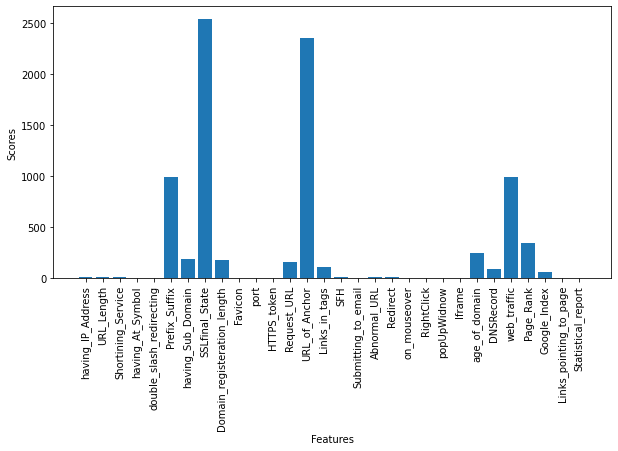

In [6]:
from sklearn.feature_selection import SelectPercentile,chi2
selectPercentile = SelectPercentile(percentile=100).fit(features,labels)
xrange = selectPercentile.feature_names_in_
yrange = selectPercentile.scores_

plt.figure(figsize = (10,5))
plt.bar(xrange,yrange)
plt.ylabel("Scores")
plt.xlabel("Features")
plt.xticks(rotation = 90)
plt.show()

#### Selecting 50% of the features

In [7]:
selectPercentile = SelectPercentile(percentile=50).fit(features,labels)
kbestfeatures = selectPercentile.transform(features)

#### Applying Feature and Label Encoding

In [8]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
encodedfeatures = OneHotEncoder().fit_transform(kbestfeatures)
encodedtarget = LabelEncoder().fit_transform(labels)

#### Splitting Data into Training and Testing

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(encodedfeatures,encodedtarget,test_size=0.3,random_state=0)

In [10]:
cv  = KFold(n_splits=10)

In [11]:
from sklearn.metrics import make_scorer
f1 = make_scorer(f1_score,greater_is_better=True)

#### Logistic Regression

In [12]:
#getting baseline figures on different models before hyper parameter tuning
from sklearn.linear_model import SGDClassifier

LogReg = SGDClassifier(loss='log',random_state=0)
cross_validate(LogReg,X_train,y_train,cv = cv,return_train_score=True,scoring=f1)

{'fit_time': array([0.0119679 , 0.00897646, 0.00997257, 0.00897527, 0.01001501,
        0.00997233, 0.00892329, 0.00793505, 0.00698471, 0.0079217 ]),
 'score_time': array([0.00199509, 0.0009985 , 0.00099802, 0.        , 0.0009985 ,
        0.00095558, 0.00104213, 0.00100255, 0.00099373, 0.00099707]),
 'test_score': array([0.94117647, 0.944     , 0.95424837, 0.94409938, 0.96551724,
        0.92517007, 0.94736842, 0.90789474, 0.95483871, 0.94193548]),
 'train_score': array([0.935609  , 0.95503212, 0.94819021, 0.95408895, 0.9557008 ,
        0.95670996, 0.94018297, 0.96051687, 0.95265841, 0.95645756])}

#### Linear Support Vector Machine

In [13]:
svm = SGDClassifier(loss='hinge',random_state=0)
cross_validate(svm,X_train,y_train,cv = cv ,return_train_score=True,scoring = f1)

{'fit_time': array([0.00897765, 0.00598311, 0.00598216, 0.00398874, 0.00598335,
        0.00398874, 0.0039885 , 0.00398874, 0.00398874, 0.00498652]),
 'score_time': array([0.00099826, 0.00099945, 0.00099802, 0.00101829, 0.        ,
        0.00099754, 0.00099754, 0.00099778, 0.00099778, 0.        ]),
 'test_score': array([0.93491124, 0.93023256, 0.94736842, 0.93167702, 0.88888889,
        0.92105263, 0.95857988, 0.90789474, 0.93670886, 0.94267516]),
 'train_score': array([0.92331768, 0.94965035, 0.94416961, 0.95176386, 0.90622951,
        0.94751575, 0.93886156, 0.95460993, 0.94881038, 0.95658572])}

#### RBF Kernel SMV

In [14]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',random_state=0)
cross_validate(svc,X_train,y_train,cv = cv,return_train_score=True,scoring=f1)

{'fit_time': array([0.06084394, 0.05585027, 0.0588448 , 0.05290532, 0.05380678,
        0.0538609 , 0.05285168, 0.05285907, 0.05480385, 0.05485296]),
 'score_time': array([0.00697994, 0.00693178, 0.00697923, 0.00798059, 0.00797725,
        0.00698161, 0.00697875, 0.00698233, 0.01001835, 0.00698209]),
 'test_score': array([0.97175141, 0.96      , 0.97297297, 0.96855346, 0.97902098,
        0.94520548, 0.95705521, 0.94039735, 0.96103896, 0.95597484]),
 'train_score': array([0.97032641, 0.97281831, 0.97293343, 0.97368421, 0.97175959,
        0.97454545, 0.97341211, 0.97532656, 0.9730124 , 0.97589481])}

#### Bernoulli Naive Bayes

In [15]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
cross_validate(bnb,X_train,y_train,cv = cv ,return_train_score=True ,scoring=f1)

{'fit_time': array([0.00203466, 0.00203466, 0.00303173, 0.00100017, 0.00195265,
        0.00199461, 0.00199485, 0.00099707, 0.00204062, 0.00100136]),
 'score_time': array([0.00099397, 0.00195646, 0.00100064, 0.00099659, 0.00099707,
        0.0009973 , 0.00099683, 0.00099754, 0.00099564, 0.00099301]),
 'test_score': array([0.95454545, 0.928     , 0.95945946, 0.95061728, 0.94520548,
        0.92307692, 0.925     , 0.9261745 , 0.96688742, 0.93670886]),
 'train_score': array([0.94187779, 0.94176851, 0.94065934, 0.9457478 , 0.94521549,
        0.94606414, 0.94403535, 0.94521549, 0.93979442, 0.94813733])}

#### Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=12,random_state=0)
cross_validate(dtc,X_train,y_train,cv = cv ,return_train_score=True,scoring=f1)

{'fit_time': array([0.00697994, 0.0069809 , 0.00598383, 0.00698137, 0.00797844,
        0.00598335, 0.00598311, 0.00598335, 0.00598311, 0.00598407]),
 'score_time': array([0.00099778, 0.00099802, 0.0009973 , 0.0009973 , 0.00099826,
        0.00099754, 0.00099826, 0.        , 0.00099778, 0.00099754]),
 'test_score': array([0.96551724, 0.976     , 0.91549296, 0.96202532, 0.95714286,
        0.95172414, 0.96969697, 0.96052632, 0.96103896, 0.92993631]),
 'train_score': array([0.99180938, 0.99064075, 0.99270073, 0.99117647, 0.99053168,
        0.99197666, 0.99185788, 0.99047619, 0.99191771, 0.99117647])}

### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth=12,oob_score=True)
cross_validate(rfc,X_train,y_train,cv = cv ,return_train_score=True,return_estimator=True,scoring=f1)

{'fit_time': array([0.34607506, 0.34203649, 0.36107683, 0.35010839, 0.35101342,
        0.34408426, 0.36602283, 0.34602213, 0.35410309, 0.34900928]),
 'score_time': array([0.01201034, 0.01097226, 0.01097083, 0.01296639, 0.01097035,
        0.01097012, 0.01196861, 0.0169549 , 0.01196814, 0.01196766]),
 'estimator': [RandomForestClassifier(max_depth=12, oob_score=True),
  RandomForestClassifier(max_depth=12, oob_score=True),
  RandomForestClassifier(max_depth=12, oob_score=True),
  RandomForestClassifier(max_depth=12, oob_score=True),
  RandomForestClassifier(max_depth=12, oob_score=True),
  RandomForestClassifier(max_depth=12, oob_score=True),
  RandomForestClassifier(max_depth=12, oob_score=True),
  RandomForestClassifier(max_depth=12, oob_score=True),
  RandomForestClassifier(max_depth=12, oob_score=True),
  RandomForestClassifier(max_depth=12, oob_score=True)],
 'test_score': array([0.96511628, 0.96825397, 0.95238095, 0.96855346, 0.97902098,
        0.95890411, 0.96969697, 0.95424837

#### Tuning hyperparameters

In [18]:
parameter_grid = [{'n_estimators':range(50,100,10),
                  'criterion':['gini','entropy'],
                  'max_depth':range(10,31,5)}]

In [19]:
gscv = GridSearchCV(estimator=rfc,param_grid=parameter_grid,cv = cv,refit=True,scoring=f1).fit(X_train,y_train)

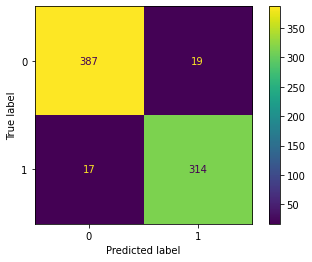

In [20]:
ConfusionMatrixDisplay.from_estimator(gscv,X_test,y_test)
plt.show()

In [21]:
print(classification_report(y_test,gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       406
           1       0.94      0.95      0.95       331

    accuracy                           0.95       737
   macro avg       0.95      0.95      0.95       737
weighted avg       0.95      0.95      0.95       737



#### Model Parameters

In [22]:
print("Best parameters are:")
gscv.best_params_

Best parameters are:


{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 70}

In [23]:
print("Best score is {}".format(round(gscv.best_score_*100,3)))

Best score is 96.567
